j-platpatにて発明･考案の名称/タイトルを無人搬送車とし、日付指定を20000101～20240502とした。
国内文献が731件ヒットし、csv出力した結果が特実_国内文献.csvである。

In [276]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import MultipleLocator

# CSVファイル読み込み
df = pd.read_csv("特実_国内文献.csv")

# 出願年を抽出
df["出願年"] = pd.to_datetime(df["出願日"]).dt.year

# 年ごとの出願件数集計
df_grouped = df.groupby("出願年")["文献番号"].count().reset_index()
df_grouped.columns = ["出願年", "出願件数"]

# 発明者/権利者ごとの一年ごとの出願件数を集計　ピボットテーブルにする
inventor_counts = df.groupby(
    ["出願人/権利者", "出願年"])["文献番号"].count().unstack().fillna(0)  # NaN値を0で置き換える
inventor_counts = inventor_counts.astype(int)

# 出願者ごとの出願数
inventor_application_counts = inventor_counts.sum(axis=1)
# 出願年ごとの出願数
annual_applications = inventor_counts.sum(axis=0)

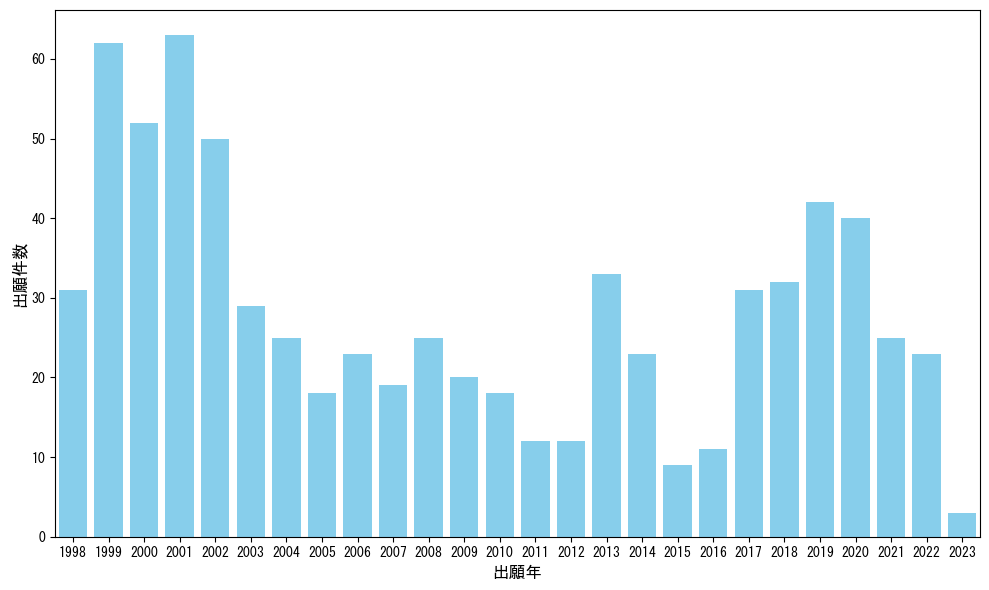

In [277]:

# グラフ作成
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(annual_applications.index,
              annual_applications.values, color='skyblue')
# 軸ラベルとタイトル設定
plt.xlabel("出願年", fontsize=12)
plt.ylabel("出願件数", fontsize=12)

# グリッド線と目盛設定
# ax.grid(True)
major_locator = MultipleLocator(1)
ax.xaxis.set_major_locator(major_locator)

# 日本語表示設定
plt.rcParams['font.family'] = 'MS Gothic'
plt.tick_params(labelsize=10)

# 横軸ラベルの範囲設定
ax.set_xlim(df_grouped["出願年"].min()-0.5, df_grouped["出願年"].max()+0.5)

# グラフ表示
plt.tight_layout()
plt.show()

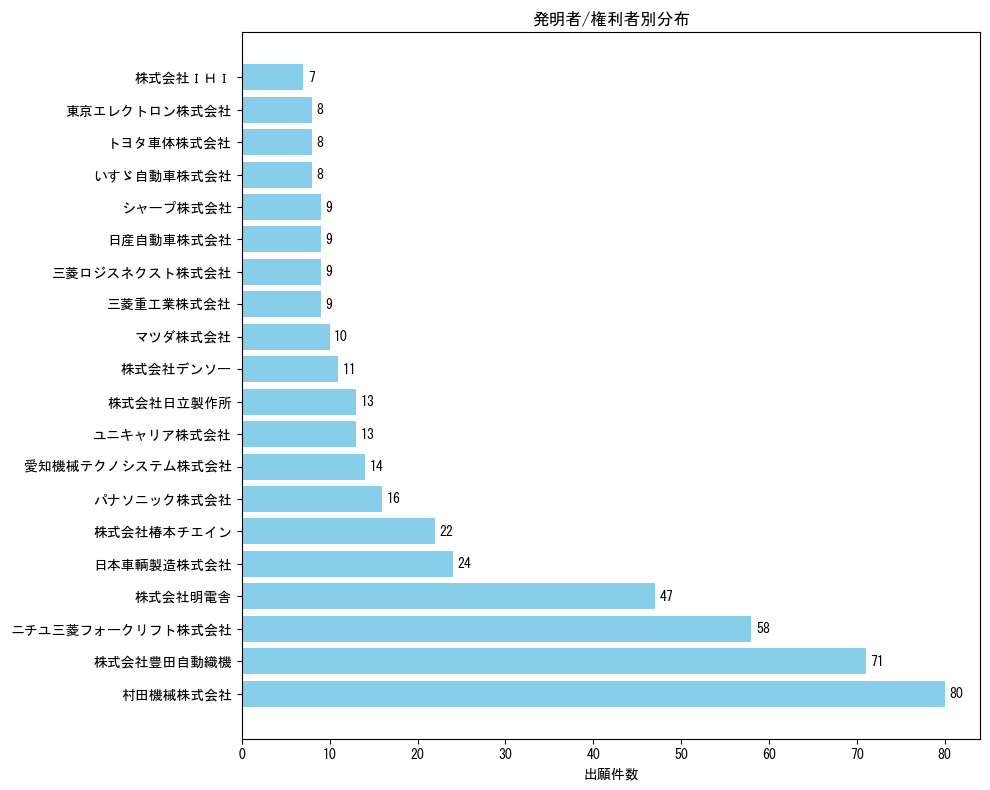

In [278]:
# 上位n人の発明者を表示する
n=20

inventor_application_counts_sorted = inventor_application_counts.sort_values(
    ascending=False)

top_inventors = inventor_application_counts_sorted.index[:n]
top_counts = inventor_application_counts_sorted.values[:n]

# グラフ作成
plt.figure(figsize=(10, 8))
bars = plt.barh(top_inventors, top_counts,
    color='skyblue'
)
# Add labels for each bar
for i, (bar, count) in enumerate(zip(bars, top_counts)):
    label_text = f"{count:,}"  # Format count with commas for readability
    x_offset = 0.5  # Adjust this offset to position the label correctly
    center_x, center_y = bar.get_center()

    plt.text(bar.get_width() + x_offset, center_y, label_text,
             ha='left', va='center', fontsize=10, color='black')
    
# 凡例を表示
# plt.legend(loc="lower right")  # 凡例の位置を右上に変更
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # 凡例の位置を右上に変更

plt.xlabel("出願件数")
plt.title("発明者/権利者別分布")
# plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

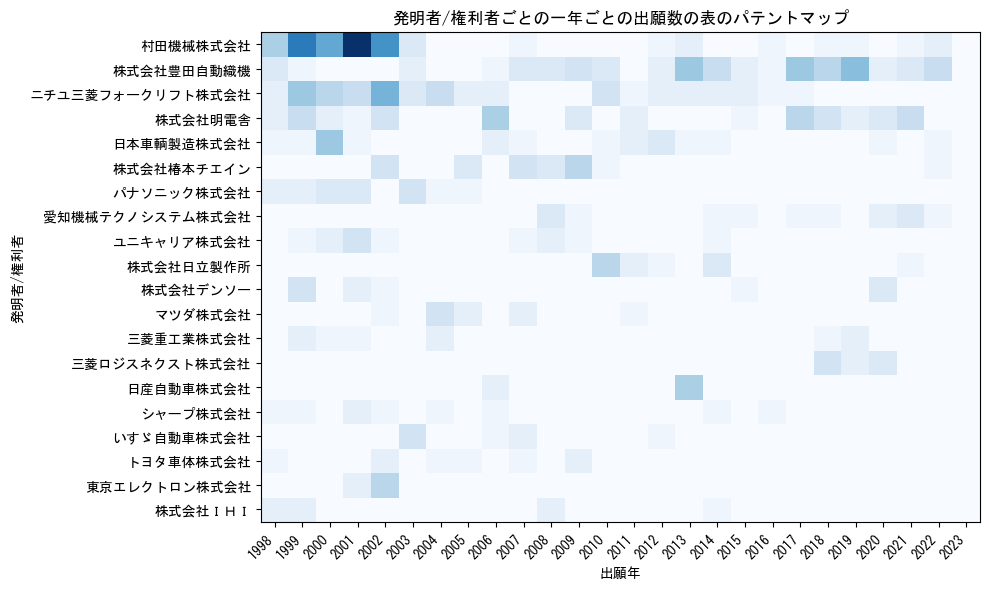

In [317]:

# 不明なキーを削除
top_inventor_counts = inventor_counts.drop(index=inventor_counts.index[~inventor_counts.index.isin(
    top_inventors)], inplace=False)

top_inventors_list = top_inventors.tolist()
reversed_top_inventors_list = top_inventors_list[::-1]
top_inventor_counts = top_inventor_counts.loc[reversed_top_inventors_list]

# # データを正規化する
# top_inventor_counts_standardization = (top_inventor_counts - top_inventor_counts.mean()
#                    ) / top_inventor_counts.std()

# 発明者/権利者名のリストを作成
top_inventor_names = top_inventor_counts.columns.tolist()
# 発明者/権利者番号を作成
top_inventor_numbers = range(len(top_inventor_names))

# サブプロットを作成
fig, ax = plt.subplots(figsize=(10, 6))

# パテントマップの作成
cmap = plt.cm.Blues  # 他のカラーマップに変更することもできます
vmin = top_inventor_counts.min().min()
vmax = top_inventor_counts.max().max()
ax.pcolor(top_inventor_counts,
          cmap=cmap, vmin=vmin, vmax=vmax)  # 修正

ax.set_xticks([i + 0.5 for i in range(len(top_inventor_numbers))])
ax.set_yticks([i + 0.5 for i in range(len(top_inventor_counts.index))])

# 軸の目印のラベルを設定
ax.set_xticklabels(top_inventor_names, rotation=45, ha="right")
ax.set_yticklabels(top_inventor_counts.index)

# グラフのタイトルを設定
plt.title("発明者/権利者ごとの一年ごとの出願数のパテントマップ")

# グラフを表示
plt.tight_layout()
plt.show()

<Axes: xlabel='出願日'>

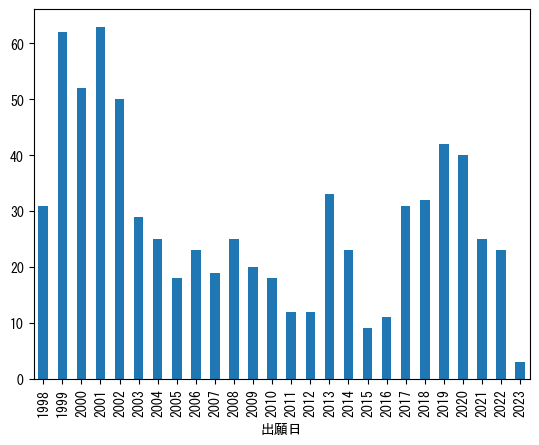

In [97]:
import pandas as pd

# CSVファイル読み込み
df = pd.read_csv("特実_国内文献.csv")

# 必要な列のデータ型を変更
df["出願日"] = pd.to_datetime(df["出願日"])  # 日付列をdatetime型に変換
df["公知日"] = pd.to_datetime(df["公知日"])
# その他の数値列があれば同様に変換

# グラフ作成
# 例: 出願日ごとの出願件数をプロット
df.groupby(df["出願日"].dt.year)["文献番号"].count().plot(kind="bar")

<Axes: ylabel='出願人/権利者'>

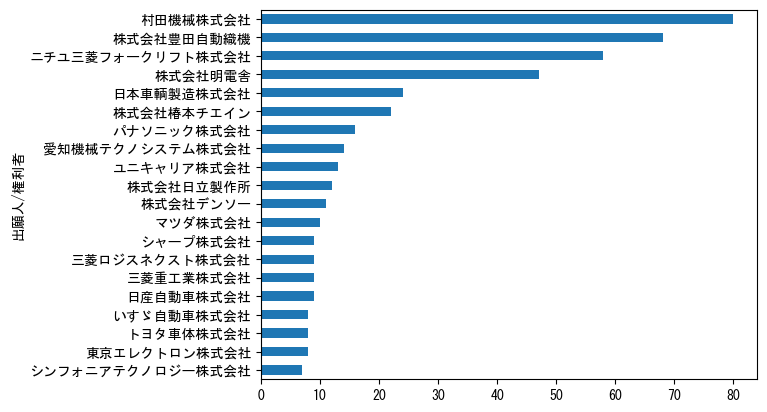

In [98]:
# 不要な列を削除
# df = df.drop(columns=["文献番号", "出願番号", "その他"])

# 出願人/権利者ごとに公開番号の数をカウントし、上位20件を取得
top_applicants = df.groupby("出願人/権利者")["公開番号"].count().nlargest(20)
top_applicants = top_applicants[::-1]
# 上位20件の出願人/権利者に関連する公開番号の数を棒グラフでプロット
top_applicants.plot(kind="barh")